This dataset is created for prediction of Graduate Admissions.

1. GRE Scores
2. TOEFL Scores
3. University Rating
4. Statement of Purpose
5. Letters of Recommendation
6. Undergraduate GPA
7. Research Experience
8. Chance of Admission

**Load the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Import the dataset**

In [2]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.shape # Shape of the data (num_rows, num_cols)

(400, 9)

In [4]:
data.info() #Data type of each variable; number of values in each

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### EDA Descriptive Statistics

In [5]:
data.mean() # mean of each attribute

Serial No.           200.500000
GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

In [7]:
data['GRE Score'].mode() # two values have the same mode

0    312
1    324
dtype: int64

In [8]:
data.median()

Serial No.           200.50
GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
dtype: float64

In [14]:
print(data.quantile(q=.25))
print()
print(data.quantile(q=.5))
print()
print(data.quantile(q=.75))

Serial No.           100.75
GRE Score            308.00
TOEFL Score          103.00
University Rating      2.00
SOP                    2.50
LOR                    3.00
CGPA                   8.17
Research               0.00
Chance of Admit        0.64
Name: 0.25, dtype: float64

Serial No.           200.50
GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
Name: 0.5, dtype: float64

Serial No.           300.2500
GRE Score            325.0000
TOEFL Score          112.0000
University Rating      4.0000
SOP                    4.0000
LOR                    4.0000
CGPA                   9.0625
Research               1.0000
Chance of Admit        0.8300
Name: 0.75, dtype: float64


### Plotting the summary mean/mode/median using a histogram

Mean:  316.8075
Median:  317.0
Mode:  0    312
1    324
dtype: int64


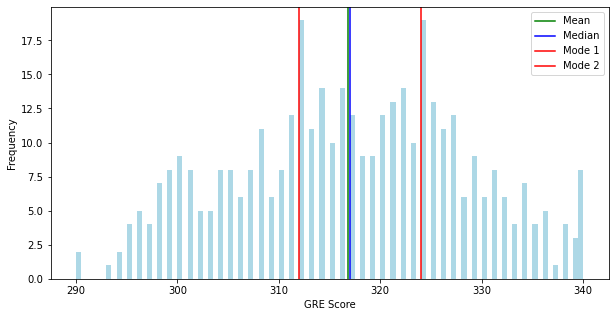

In [22]:
mean = data['GRE Score'].mean()
mode = data['GRE Score'].mode()
median = data['GRE Score'].median()

print('Mean: ', mean)
print('Median: ', median)
print('Mode: ', mode)

plt.figure(figsize=(10,5))
plt.hist(data['GRE Score'], bins=100, color='lightblue')

plt.axvline(mean, color='green', label='Mean')
plt.axvline(median, color='blue', label='Median')
plt.axvline(mode[0], color='red', label='Mode 1')
plt.axvline(mode[1], color='red', label='Mode 2')

plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [23]:
data.describe() #five number summary for each relevant data point

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Manually calculate IQR values for a given property**

In [24]:
data['GRE Score'].quantile(.75) - data['GRE Score'].quantile(.25)

17.0

In [25]:
data['TOEFL Score'].quantile(.75) - data['TOEFL Score'].quantile(.25)

9.0

### Summary statistics with Box Plots

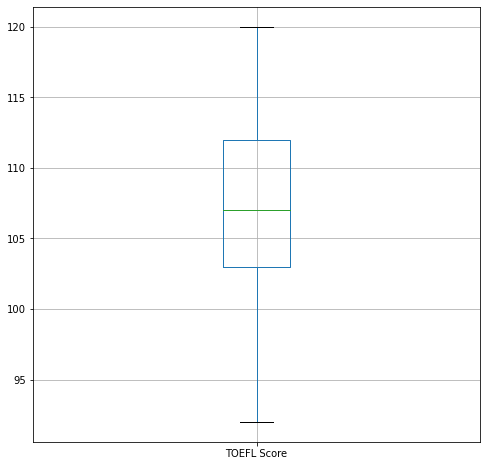

In [28]:
data.boxplot(column="TOEFL Score", return_type='axes', figsize=(8,8));

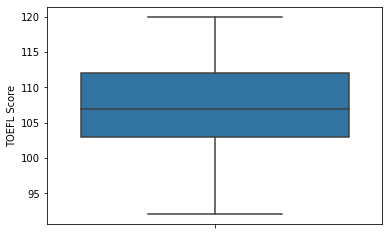

In [33]:
# You would typically import at the beginning but just including sns to show the difference in default boxplots
import seaborn as sns

sns.boxplot(y="TOEFL Score", data=data);

In [34]:
print(data.max() - data.min())

Serial No.           399.00
GRE Score             50.00
TOEFL Score           28.00
University Rating      4.00
SOP                    4.00
LOR                    4.00
CGPA                   3.12
Research               1.00
Chance of Admit        0.63
dtype: float64


In [35]:
data.var()

Serial No.           13366.666667
GRE Score              131.644555
TOEFL Score             36.838997
University Rating        1.308114
SOP                      1.013784
LOR                      0.807262
CGPA                     0.355594
Research                 0.248365
Chance of Admit          0.020337
dtype: float64

In [36]:
data.std()

Serial No.           115.614301
GRE Score             11.473646
TOEFL Score            6.069514
University Rating      1.143728
SOP                    1.006869
LOR                    0.898478
CGPA                   0.596317
Research               0.498362
Chance of Admit        0.142609
dtype: float64

In [37]:
data.cov()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,13366.666667,-129.369674,-103.807018,-22.472431,-19.432331,-9.164160,-3.144373,-3.637845,0.698020
GRE Score,-129.369674,131.644555,58.216967,8.778791,7.079699,5.747726,5.699742,3.318690,1.313271
TOEFL Score,-103.807018,58.216967,36.838997,4.828697,4.021053,3.095965,2.998337,1.481729,0.685179
University Rating,-22.472431,8.778791,4.828697,1.308114,0.845865,0.678352,0.509117,0.255232,0.116009
SOP,-19.432331,7.079699,4.021053,0.845865,1.013784,0.660025,0.431183,0.222807,0.097028
LOR,-9.164160,5.747726,3.095965,0.678352,0.660025,0.807262,0.359084,0.177701,0.085834
CGPA,-3.144373,5.699742,2.998337,0.509117,0.431183,0.359084,0.355594,0.155026,0.074265
Research,-3.637845,3.318690,1.481729,0.255232,0.222807,0.177701,0.155026,0.248365,0.039317
Chance of Admit,0.698020,1.313271,0.685179,0.116009,0.097028,0.085834,0.074265,0.039317,0.020337


In [38]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


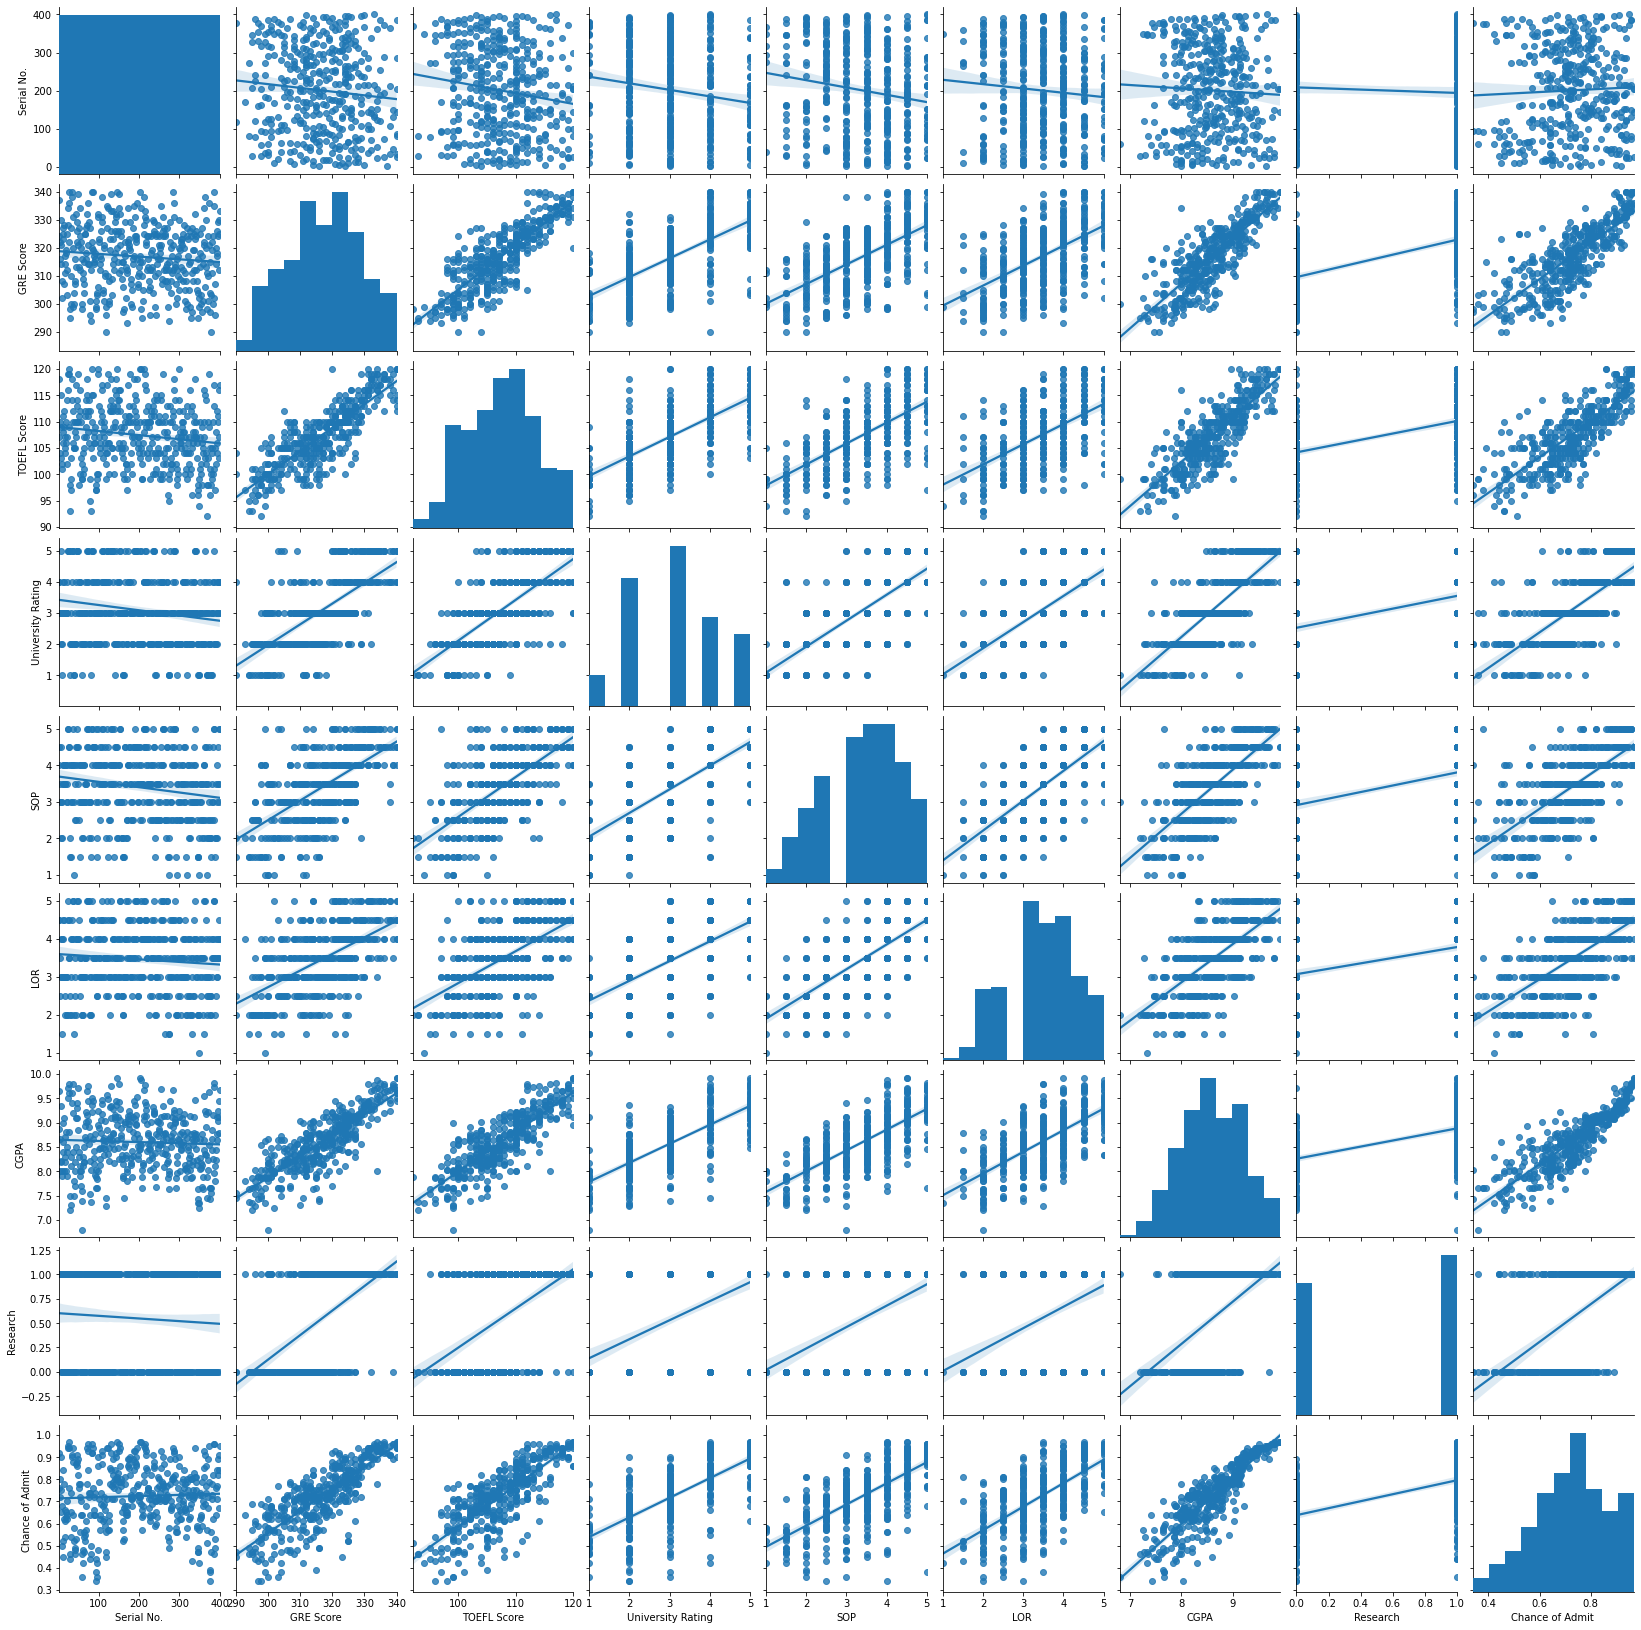

In [41]:
sns.pairplot(data, kind="reg")
plt.show()

In [44]:
data.drop('Serial No.', axis=1, inplace=True)

KeyError: "['Serial No.'] not found in axis"

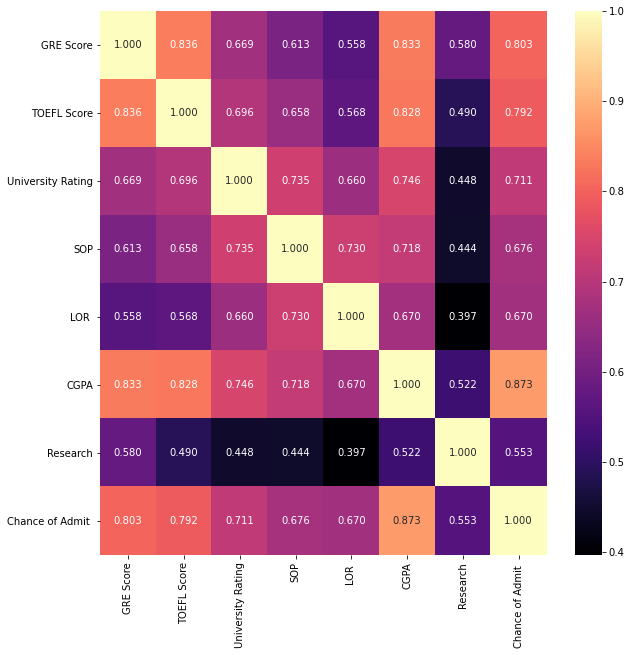

In [52]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f', cmap='magma')
plt.show()

### Check the skewness

In [53]:
data.skew()

GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64

In [54]:
import scipy.stats as stats

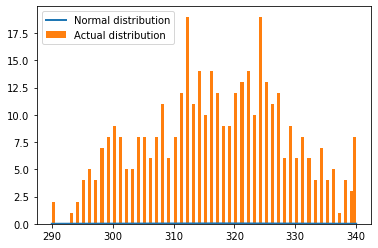

In [62]:
# Convert pandas dataframe object to numpy array, and sort
h = np.asarray(data['GRE Score'])
h = sorted(h)

# Use scipy status to fit a norm distribution with same mean and std
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

# Plot both on a histogram
plt.plot(h, fit, '-', linewidth=2, label="Normal distribution")
plt.hist(h, bins=100, label="Actual distribution")
plt.legend()
plt.show()

*Normal distribution not matching expected result, need to investigate and update*